In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import metos3d.petsc_mod as petsc
import data_conversion as dc


In [2]:
data =  np.load( r"D:\Bachelorarbeit Data\0000\save\data.npy")
land_sea_mask = petsc.read_PETSc_matrix('metos3d\\landSeaMask.petsc')
n1, n2 = np.shape(land_sea_mask.T)
n3 = int(np.amax(land_sea_mask))

## Auswerting Durchschnitt

In [3]:
means, n1, n2, n3 = petsc.reshape_vector_to_3d(land_sea_mask, np.mean(data, axis=1))
means.shape

(128, 64, 15)

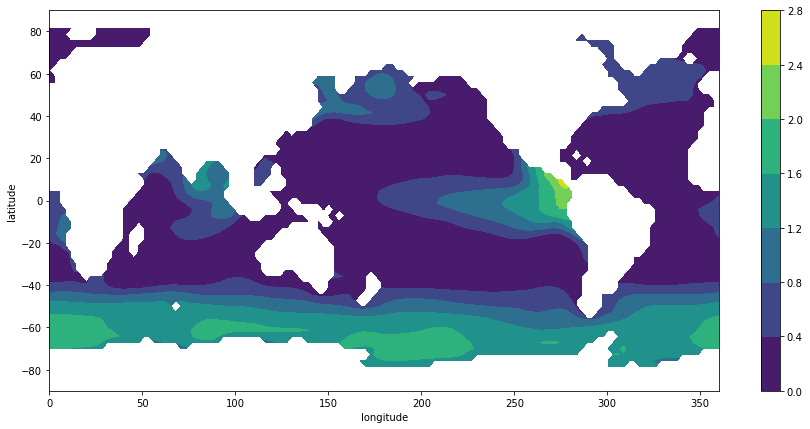

0 max 5.712472604998138
0 min 0.0
0 mean 1.7548270483983293


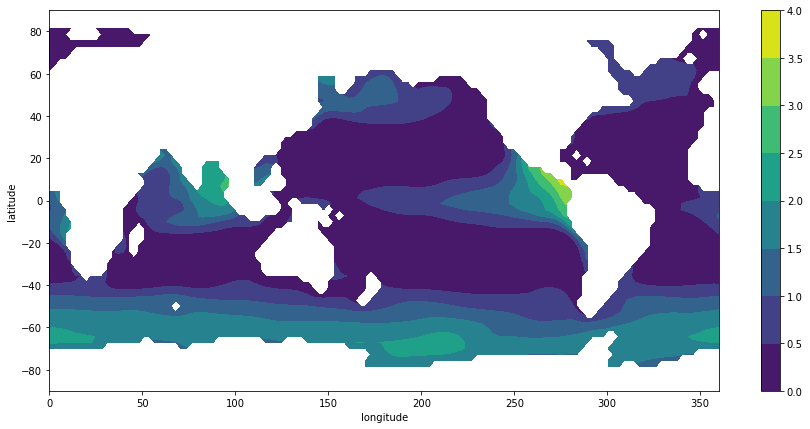

1 max 5.712472604998138
1 min 0.0
1 mean 1.7548270483983293


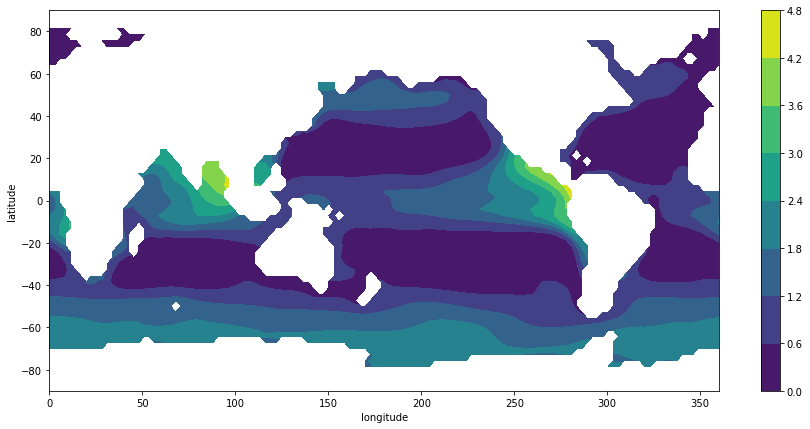

2 max 5.712472604998138
2 min 0.0
2 mean 1.7548270483983293


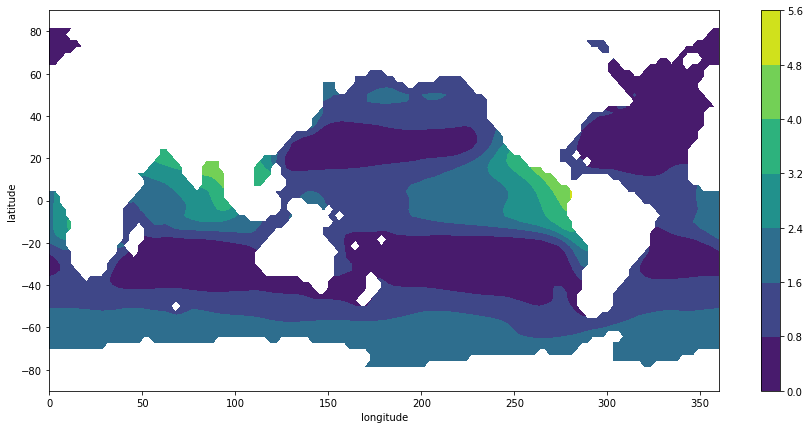

3 max 5.712472604998138
3 min 0.0
3 mean 1.7548270483983293


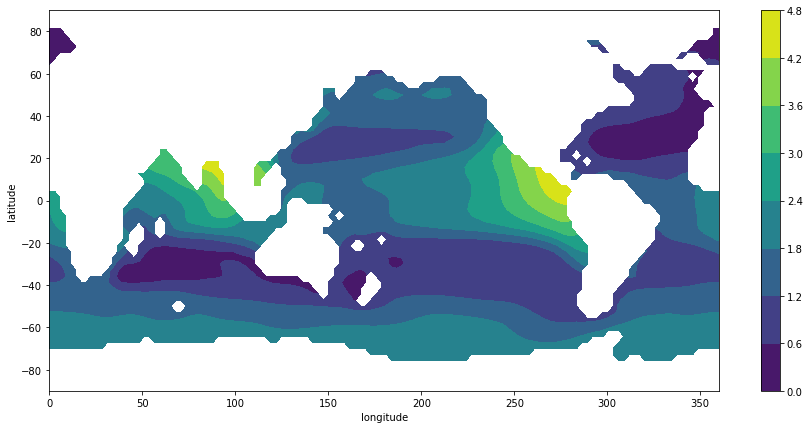

4 max 5.712472604998138
4 min 0.0
4 mean 1.7548270483983293


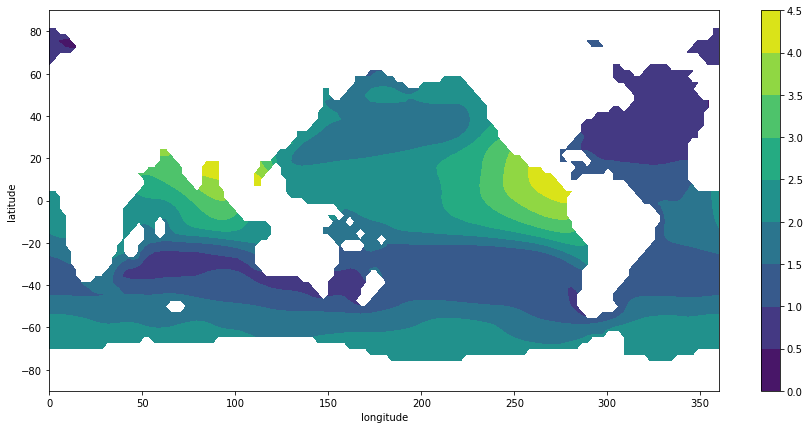

5 max 5.712472604998138
5 min 0.0
5 mean 1.7548270483983293


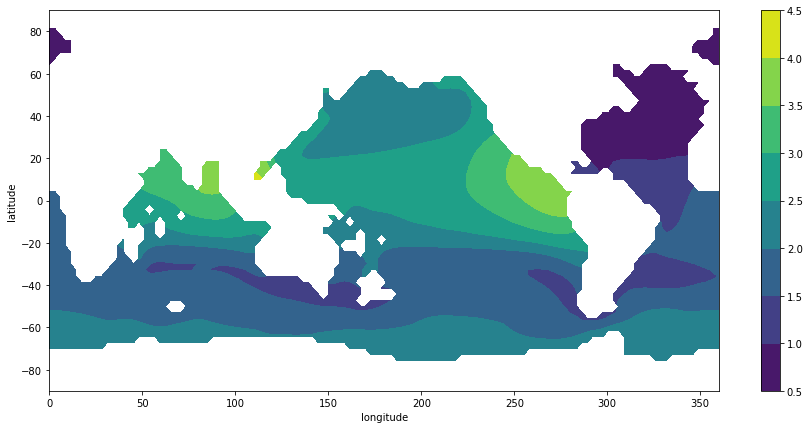

6 max 5.712472604998138
6 min 0.0
6 mean 1.7548270483983293


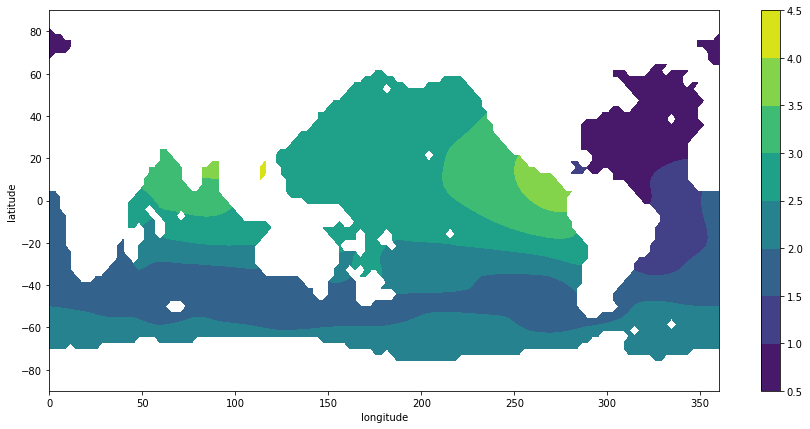

7 max 5.712472604998138
7 min 0.0
7 mean 1.7548270483983293


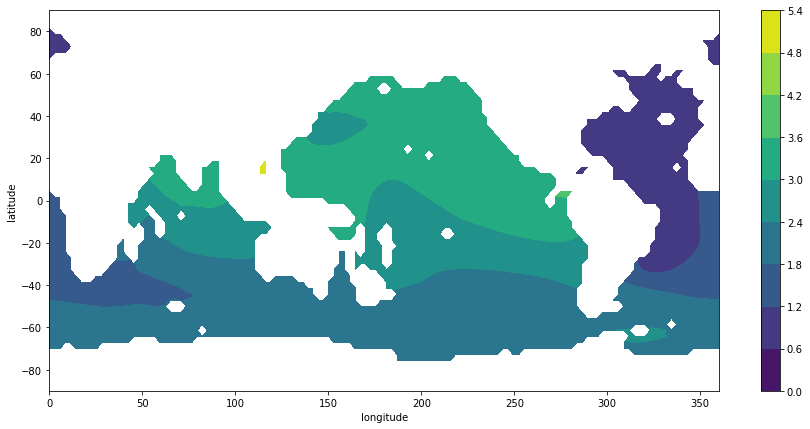

8 max 5.712472604998138
8 min 0.0
8 mean 1.7548270483983293


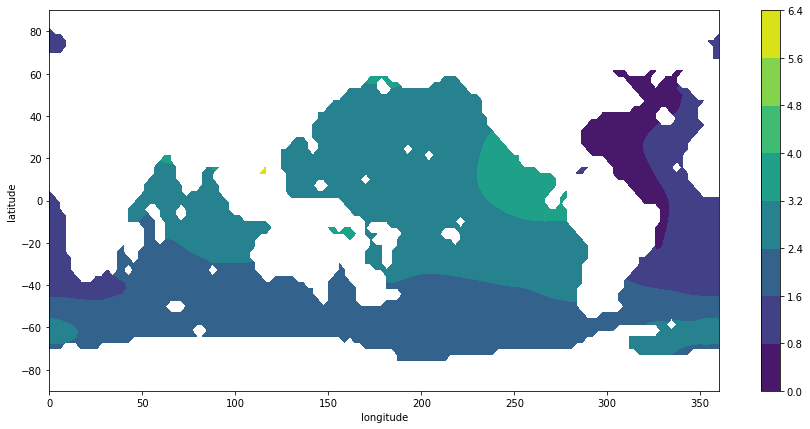

9 max 5.712472604998138
9 min 0.0
9 mean 1.7548270483983293


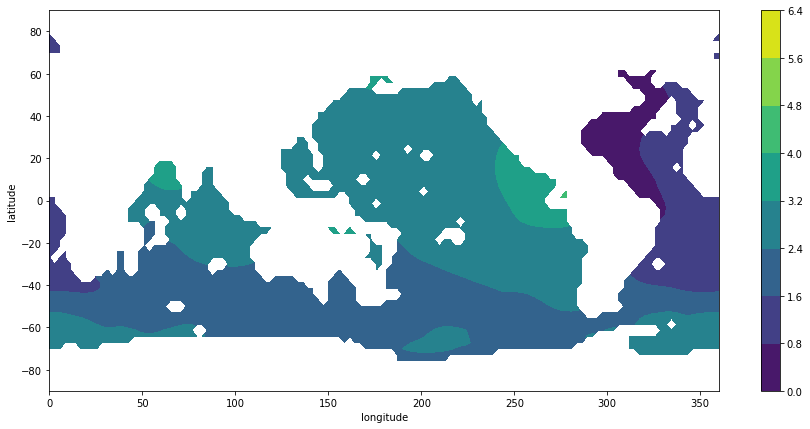

10 max 5.712472604998138
10 min 0.0
10 mean 1.7548270483983293


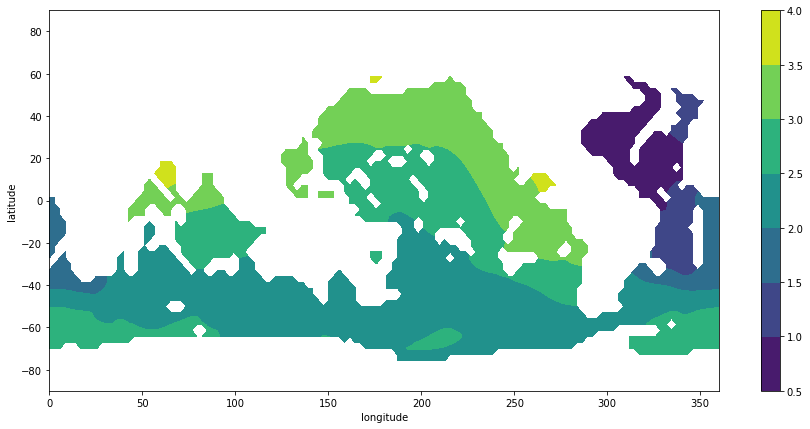

11 max 5.712472604998138
11 min 0.0
11 mean 1.7548270483983293


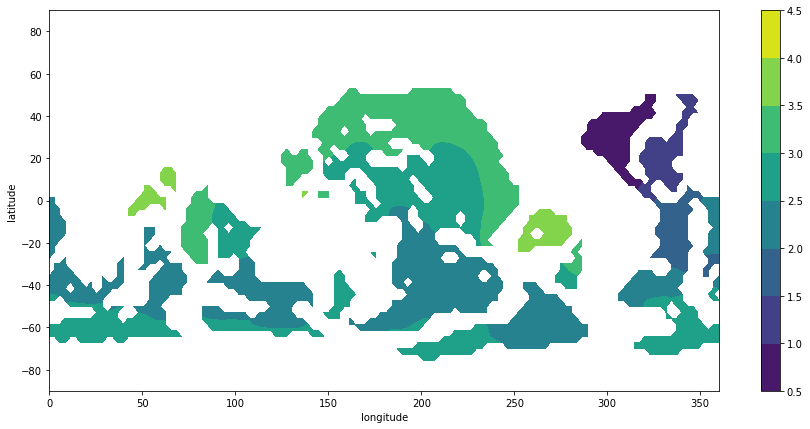

12 max 5.712472604998138
12 min 0.0
12 mean 1.7548270483983293


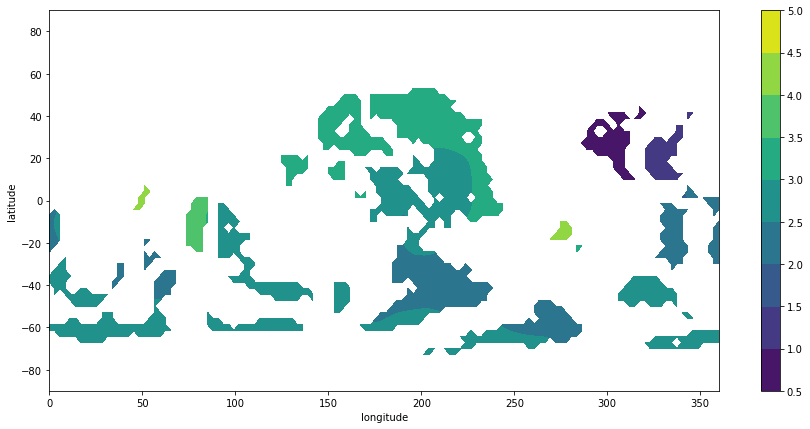

13 max 5.712472604998138
13 min 0.0
13 mean 1.7548270483983293


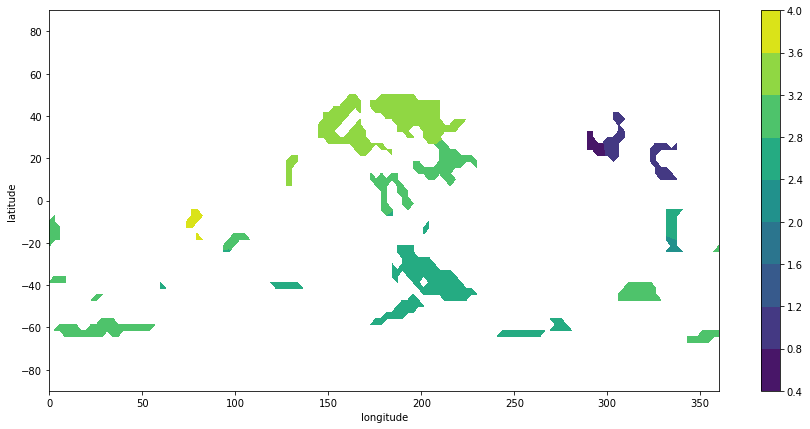

14 max 5.712472604998138
14 min 0.0
14 mean 1.7548270483983293


In [4]:
long, lat = np.meshgrid(np.linspace(-90,90, n2), np.linspace(0,360,n1))

for i in range(15):
    fig, ax = plt.subplots(figsize= (15,7))
    plot_data = means[:,:,i]
    plot = ax.contourf(lat, long, plot_data)
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    fig.colorbar(plot, ax=ax)
    plt.show()
    print(i, "max", np.nanmax(data))
    print(i, "min", np.nanmin(data))
    print(i, "mean", np.nanmean(data))


In [5]:
mean_layer = [np.nanmean(means[:,:,i]) for i in range(15)] + [np.nanmean(means)]
median_layer = [np.nanmedian(means[:,:,i]) for i in range(15)] + [np.nanmedian(means)]
max_layer = [np.nanmax(means[:,:,i]) for i in range(15)] + [np.nanmax(means)]
min_layer = [np.nanmin(means[:,:,i]) for i in range(15)] + [np.nanmin(means)]
std_layer = [np.nanstd(means[:,:,i]) for i in range(15)] + [np.nanstd(means)]
mean_frame = pd.DataFrame(data={"mean": mean_layer, "median": median_layer, "max":max_layer, "min": min_layer, "std. deviation" : std_layer})
mean_frame

,mean,median,max,min,std. deviation
0,0.602630,0.385723,2.557166,0.001410,0.565585
1,0.749656,0.524623,3.771885,0.001752,0.665310
2,1.051745,0.897501,4.642634,0.003133,0.779309
3,1.301029,1.203156,4.902974,0.076784,0.805771
4,1.557096,1.507724,4.768317,0.244402,0.778574
5,1.806533,1.791551,4.261612,0.467224,0.713737
6,2.041114,2.031863,4.087929,0.547095,0.677991
7,2.203353,2.176856,4.389729,0.544698,0.706468
8,2.267723,2.252358,5.016775,0.595564,0.757743
9,2.286396,2.322809,5.710725,0.616375,0.777443


## Auswertung Amplitude

In [6]:
amplitude = np.max(data, axis=1) - np.min(data, axis=1)

In [7]:
amplitude_3d, n1, n2, n3 = petsc.reshape_vector_to_3d(land_sea_mask, amplitude)
amplitude_3d.shape

(128, 64, 15)

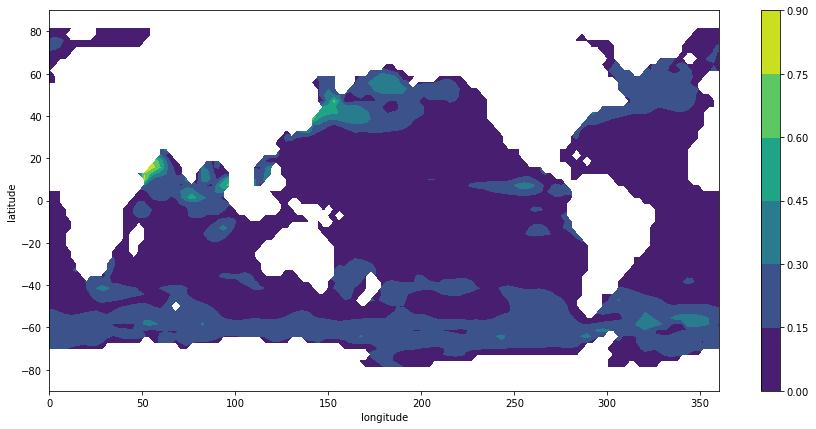

0 max 0.8405190264033493
0 min 1.974878528876456e-06
0 mean 0.11109335154591975


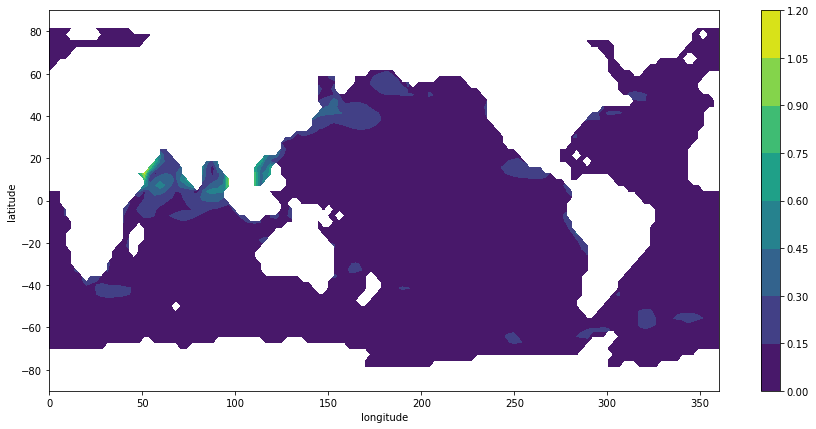

1 max 1.0665425614354584
1 min 0.000729159032204281
1 mean 0.07215372070629099


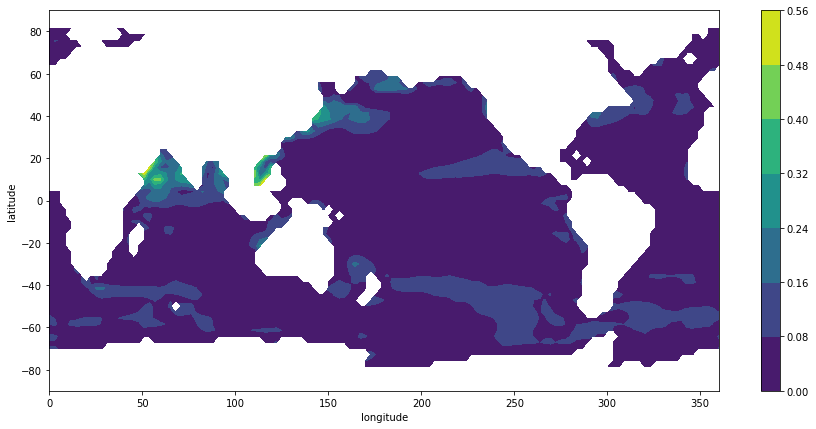

2 max 0.5340064605236474
2 min 0.0014557317883551746
2 mean 0.052402979698111016


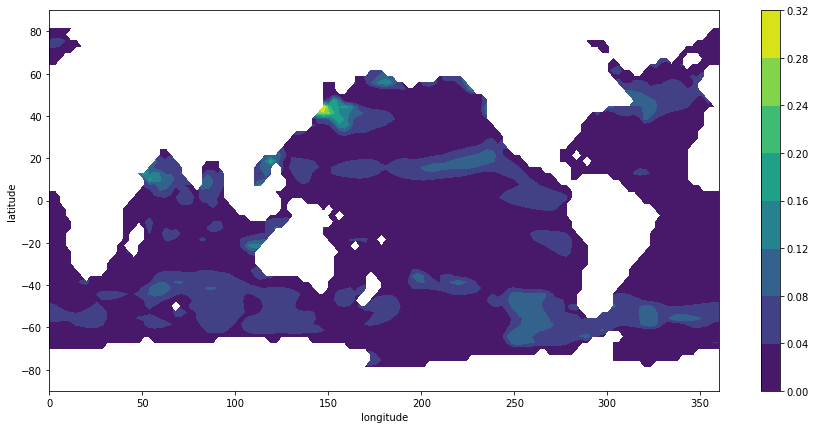

3 max 0.31587873146952106
3 min 0.0008609777877692792
3 mean 0.02930228609569451


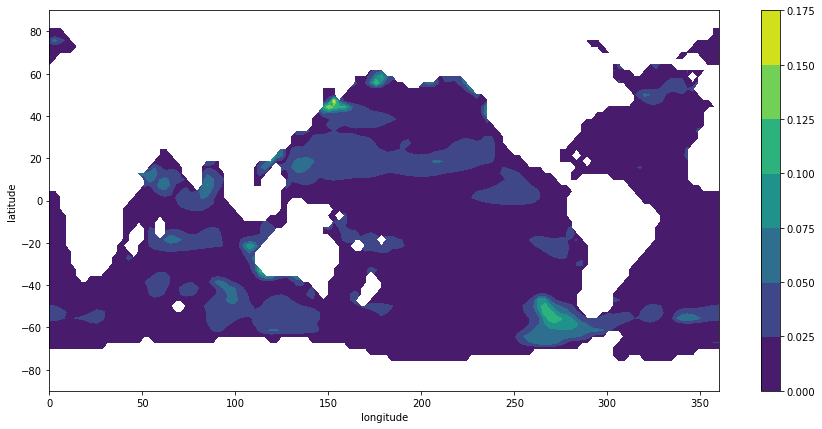

4 max 0.1610761021917242
4 min 0.00044919589583169994
4 mean 0.01645979586455512


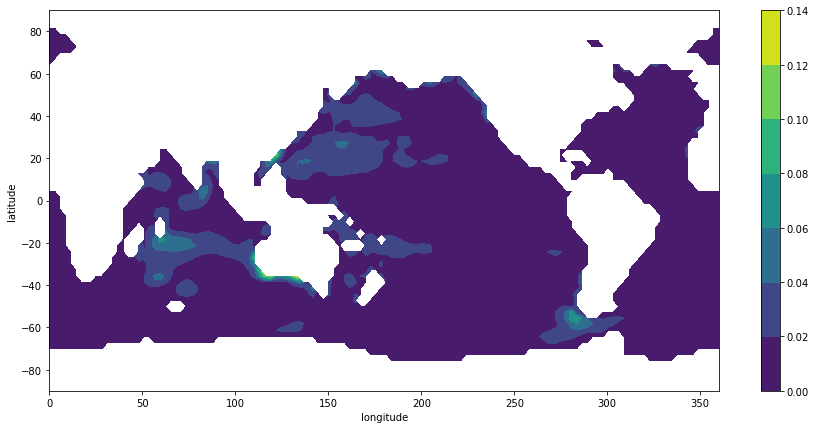

5 max 0.1278778602642764
5 min 9.568443660867842e-05
5 mean 0.01017785286361375


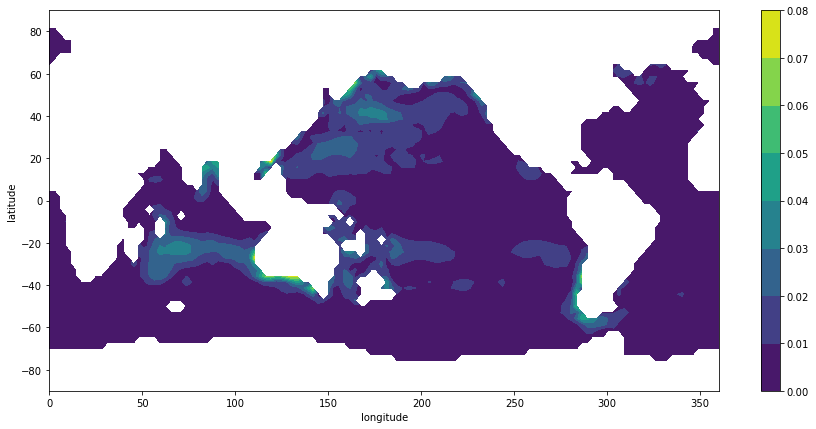

6 max 0.07610870144346915
6 min 0.00012364001098874589
6 mean 0.006779640804679979


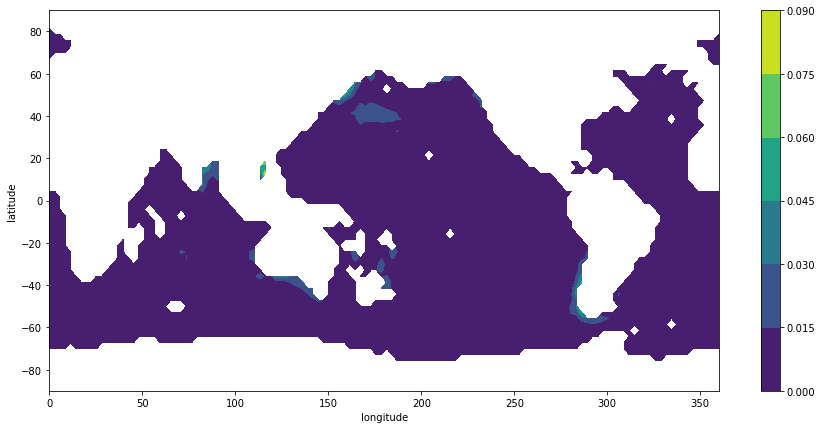

7 max 0.08555460821182059
7 min 7.991790334505033e-05
7 mean 0.004080587178315119


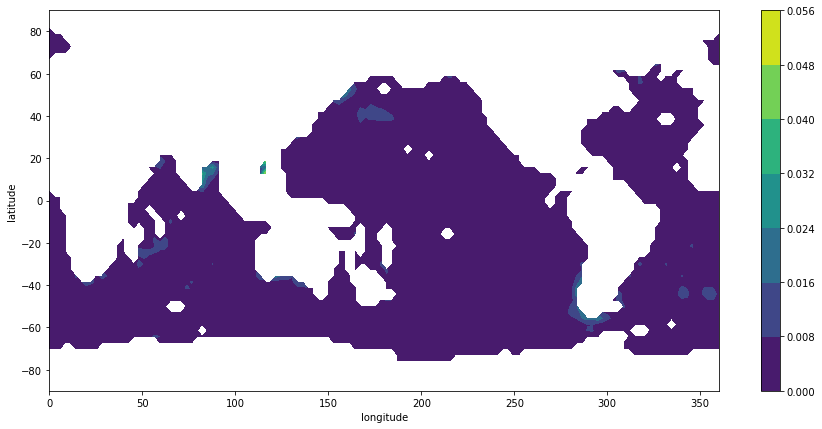

8 max 0.051404218222091735
8 min 5.362821504284465e-05
8 mean 0.002292854924093902


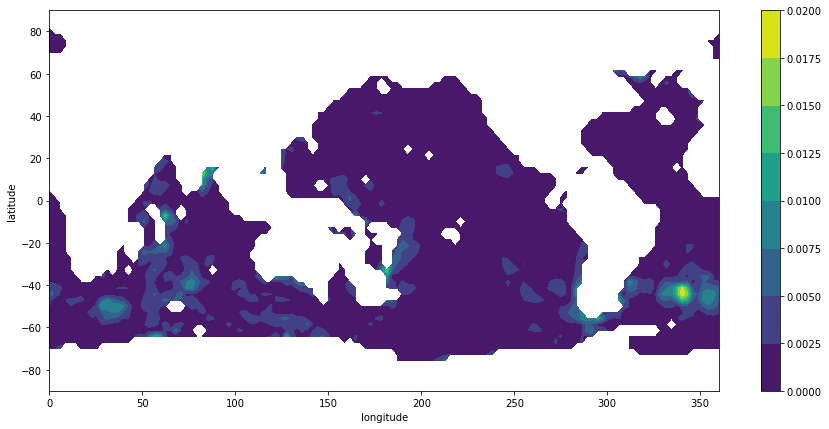

9 max 0.01927089478263122
9 min 2.093875724906713e-05
9 mean 0.0014814271411364279


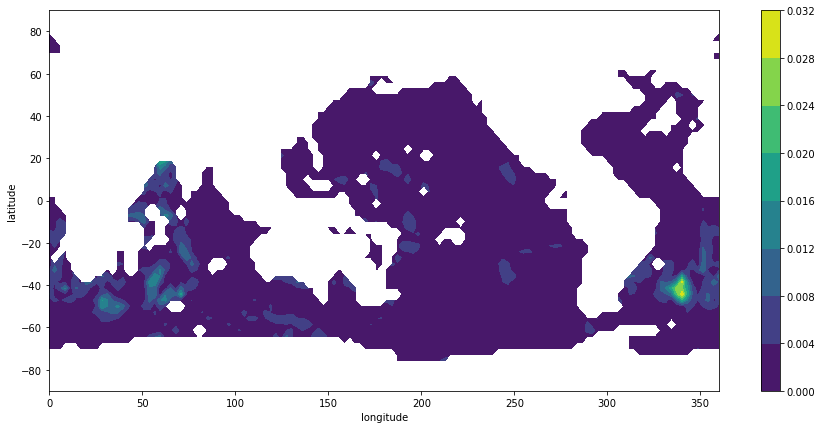

10 max 0.03071450505864215
10 min 3.636571047849202e-06
10 mean 0.0019184890932748022


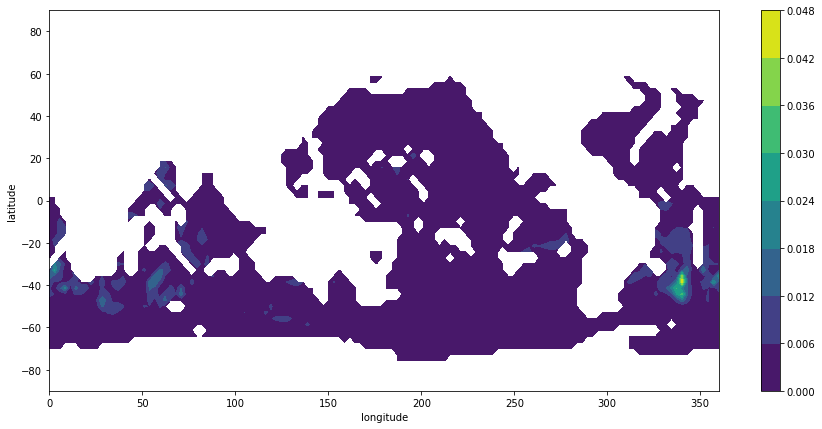

11 max 0.044286917376335166
11 min 1.9288465219924333e-05
11 mean 0.0019583763698335977


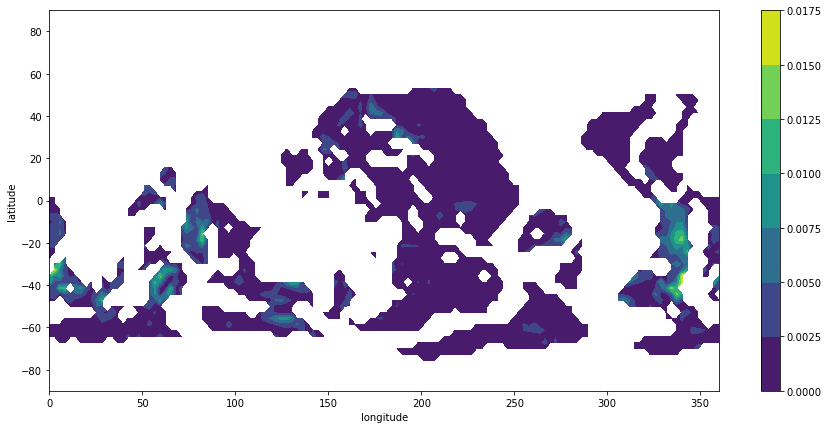

12 max 0.016561192863089325
12 min 1.4995899325853657e-05
12 mean 0.0015207599156421899


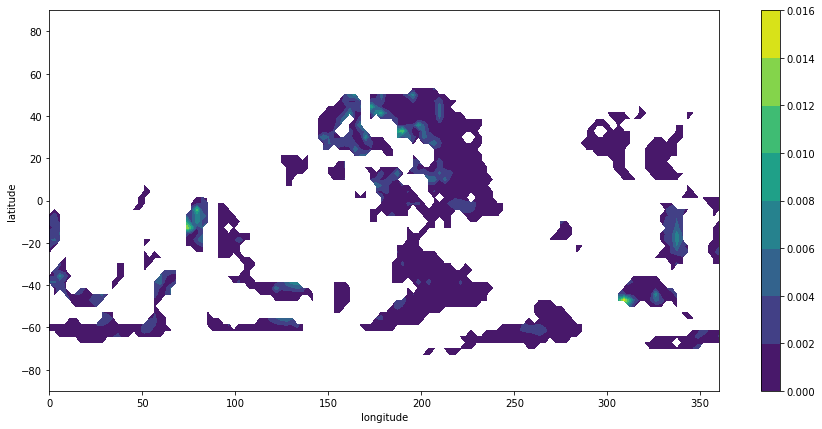

13 max 0.014866874134758845
13 min 1.5484881884297863e-05
13 mean 0.0012439747920361746


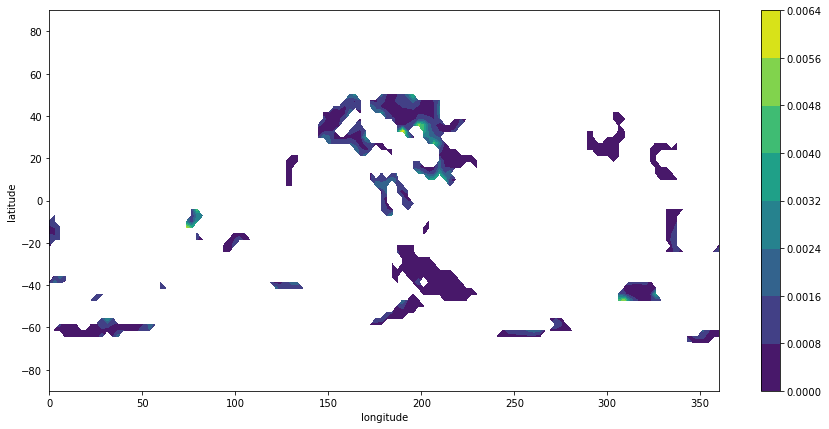

14 max 0.006099524864848327
14 min 1.3387915857476784e-05
14 mean 0.0007930846410642717


In [8]:
long, lat = np.meshgrid(np.linspace(-90,90, n2), np.linspace(0,360,n1))

for i in range(15):
    fig, ax = plt.subplots(figsize= (15,7))
    plot_data = amplitude_3d[:,:,i]
    plot = ax.contourf(lat, long, plot_data)
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    fig.colorbar(plot, ax=ax)
    plt.show()
    print(i, "max", np.nanmax(plot_data))
    print(i, "min", np.nanmin(plot_data))
    print(i, "mean", np.nanmean(plot_data))

In [9]:
mean_layer = [np.nanmean(amplitude_3d[:,:,i]) for i in range(15)] + [np.nanmean(amplitude_3d)]
median_layer = [np.nanmedian(amplitude_3d[:,:,i]) for i in range(15)] + [np.nanmedian(amplitude_3d)]
max_layer = [np.nanmax(amplitude_3d[:,:,i]) for i in range(15)] + [np.nanmax(amplitude_3d)]
min_layer = [np.nanmin(amplitude_3d[:,:,i]) for i in range(15)] + [np.nanmin(amplitude_3d)]
std_layer = [np.nanstd(amplitude_3d[:,:,i]) for i in range(15)] + [np.nanstd(amplitude_3d)]
amp_frame = pd.DataFrame(data={"mean": mean_layer, "median": median_layer, "max":max_layer, "min": min_layer, "std. deviation" : std_layer})
amp_frame

,mean,median,max,min,std. deviation
0,0.111093,0.098854,0.840519,0.000002,0.089898
1,0.072154,0.053947,1.066543,0.000729,0.078348
2,0.052403,0.040422,0.534006,0.001456,0.047792
3,0.029302,0.020355,0.315879,0.000861,0.026200
4,0.016460,0.011634,0.161076,0.000449,0.015462
5,0.010178,0.007069,0.127878,0.000096,0.010452
6,0.006780,0.004046,0.076109,0.000124,0.007829
7,0.004081,0.002517,0.085555,0.000080,0.004941
8,0.002293,0.001531,0.051404,0.000054,0.002616
9,0.001481,0.000988,0.019271,0.000021,0.001672


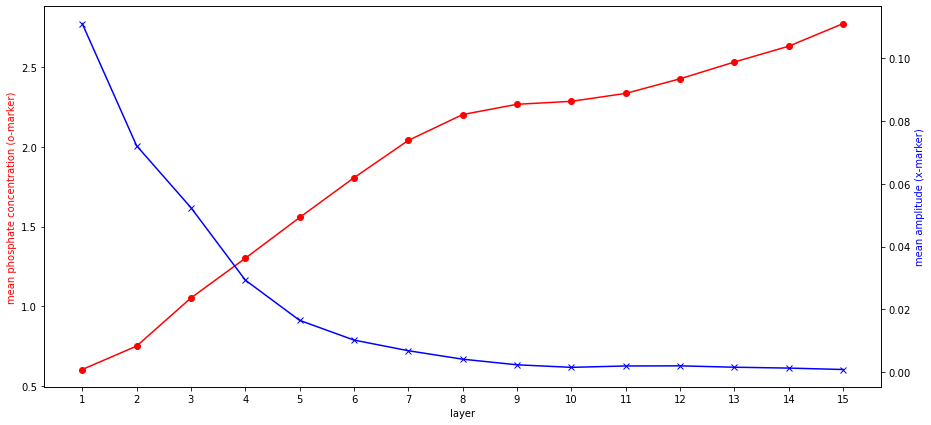

In [10]:
fig, ax = plt.subplots(figsize=(15,7))

# plot mean values per layer
ax.plot(range(1,16),  mean_frame["mean"][:15], color="red", marker="o")
ax.set_xlabel("layer")
ax.set_ylabel("mean phosphate concentration (o-marker)", color="red")
ax.set_xticks(range(1,16))

# plot mean amplitude
ax2 = ax.twinx()
ax2.plot(range(1,16),amp_frame["mean"][:15], color="blue", marker="x")
ax2.set_ylabel("mean amplitude (x-marker)", color="blue")

plt.show()


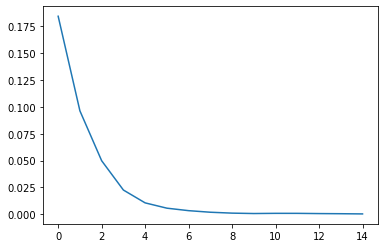

In [11]:
rel_amp = amp_frame["mean"][:15]/ mean_frame["mean"][:15]
plt.plot(rel_amp)